<a href="https://colab.research.google.com/github/likhith-kumarn/Data_Science/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

df = pd.read_csv("/content/comedy_new.csv")
df

,Age,Exp,Rank,Nationality,GO
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [25]:
df.head()

,Age,Exp,Rank,Nationality,GO
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [26]:
df

,Age,Exp,Rank,Nationality,GO
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [28]:
df.shape

(13, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           13 non-null     int64 
 1   Exp           13 non-null     int64 
 2   Rank          13 non-null     int64 
 3    Nationality  13 non-null     object
 4   GO            13 non-null     object
dtypes: int64(3), object(2)
memory usage: 652.0+ bytes


In [31]:
df.columns

Index(['Age', 'Exp', 'Rank', ' Nationality', 'GO'], dtype='object')

In [33]:
df.describe()

,Age,Exp,Rank
count,13.000000,13.000000,13.000000
mean,39.615385,8.846154,6.846154
std,13.263600,5.727800,1.908147
min,18.000000,3.000000,4.000000
25%,35.000000,4.000000,5.000000
50%,42.000000,9.000000,7.000000
75%,45.000000,13.000000,9.000000
max,66.000000,21.000000,9.000000


In [34]:
df.isnull().sum()

,0
Age,0
Exp,0
Rank,0
Nationality,0
GO,0


In [35]:
df.isnull().any()

,0
Age,False
Exp,False
Rank,False
Nationality,False
GO,False


In [45]:
from sklearn.preprocessing import LabelEncoder

# Strip whitespace from all column names to standardize them
df.columns = df.columns.str.strip()

le = LabelEncoder()

# Apply LabelEncoder to the cleaned 'Nationality' column
df['Nationality'] = le.fit_transform(df['Nationality'])
df['GO'] = le.fit_transform(df['GO'])
df

,Age,Exp,Rank,Nationality,GO
0,36,10,9,1,0
1,42,12,4,2,0
2,23,4,6,0,0
3,52,4,4,2,0
4,43,21,8,2,1
5,44,14,5,1,0
6,66,3,7,0,1
7,35,14,9,1,1
8,52,13,7,0,1
9,35,5,9,0,1


In [46]:
x=df.iloc[:,:-1]
x

,Age,Exp,Rank,Nationality
0,36,10,9,1
1,42,12,4,2
2,23,4,6,0
3,52,4,4,2
4,43,21,8,2
5,44,14,5,1
6,66,3,7,0
7,35,14,9,1
8,52,13,7,0
9,35,5,9,0


In [47]:
y=df['GO']
y

,GO
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,1
8,1
9,1


In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x,y)


DecisionTreeClassifier()

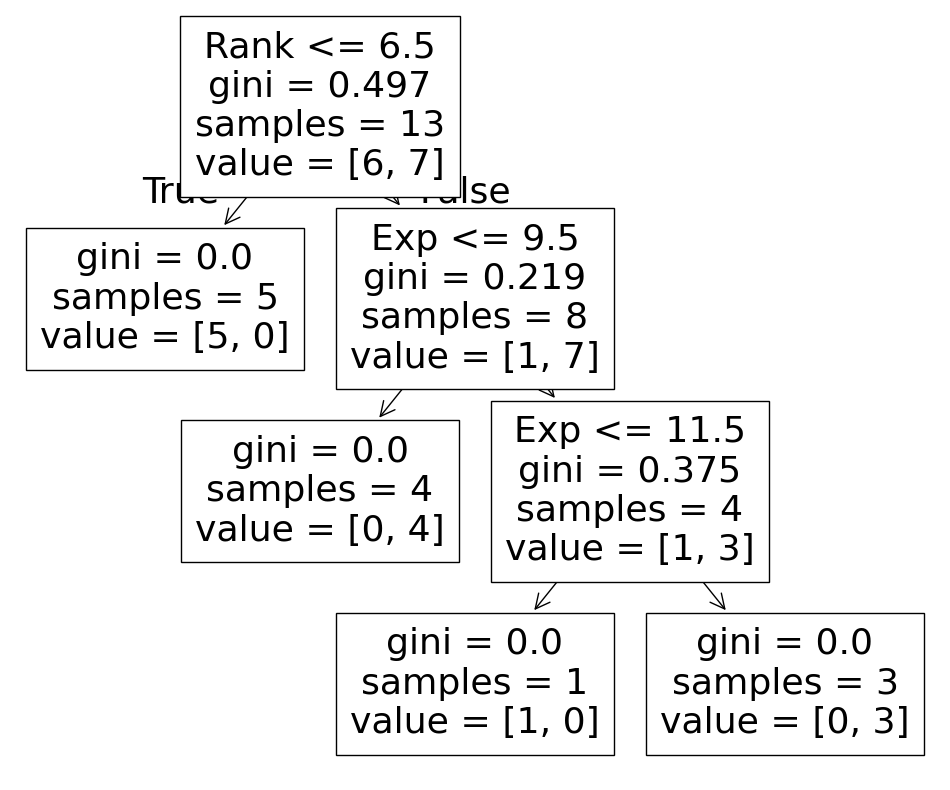

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
tree.plot_tree(dt,feature_names=x.columns)
plt.show()